<a href="https://colab.research.google.com/github/Nirikshan95/Machine-learning-models/blob/main/%5Bhouse_price_prediction%5D_mltpl_algs/%5Bhouse_price_prediction%5D_lasso_VS_ridge_VS_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [638]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

In [639]:
dataset=fetch_california_housing()
dataset

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [640]:
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [641]:
dataset.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [642]:
df=pd.DataFrame(data=dataset['data'],columns=dataset['feature_names'])
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [643]:
dataset.target_names

['MedHouseVal']

In [644]:
dataset.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [645]:
df['MedHouseVal']=dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [646]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(x.shape)
print(y.shape)

(20640, 8)
(20640,)


In [647]:
x

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [648]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

In [649]:
'''scaler=StandardScaler()
scaler.fit(x)
x=pd.DataFrame(scaler.transform(x),columns=x.columns)'''

'scaler=StandardScaler()\nscaler.fit(x)\nx=pd.DataFrame(scaler.transform(x),columns=x.columns)'

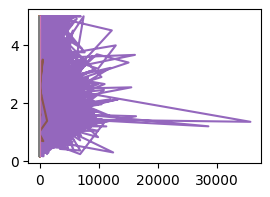

In [650]:

plt.figure(figsize=(3,2))
plt.plot(df.iloc[:,:-1],y)
plt.show()

In [651]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [652]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

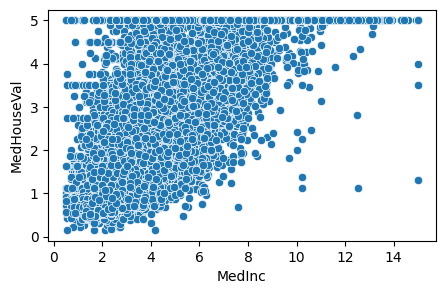

----


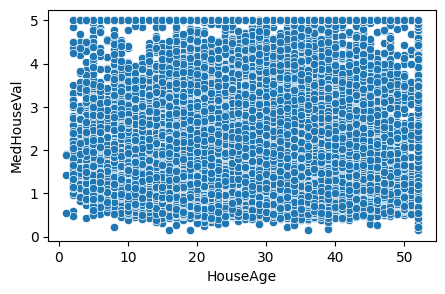

----


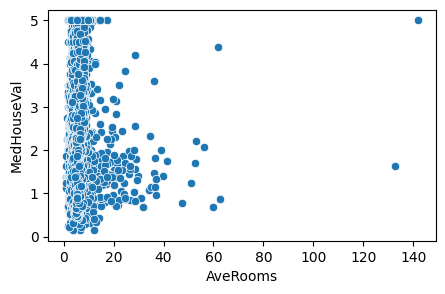

----


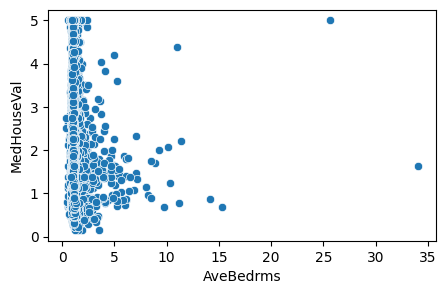

----


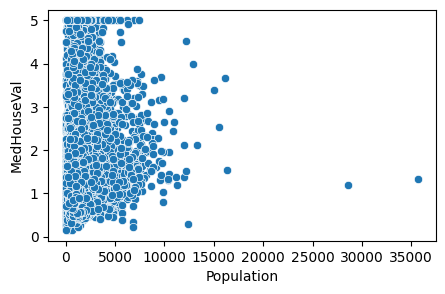

----


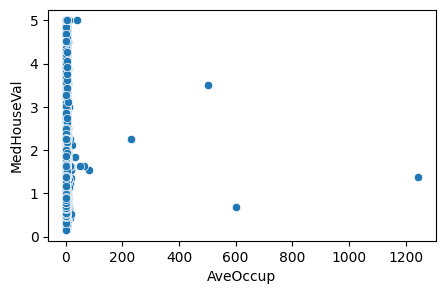

----


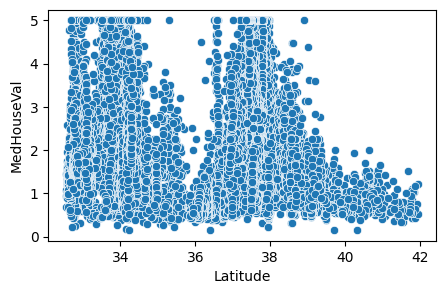

----


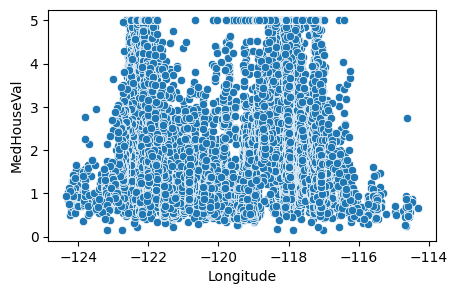

----


In [653]:
for i in dataset.feature_names:
    for j in dataset.target_names:
        plt.figure(figsize=(5,3))
        sns.scatterplot(x=df[i],y=df[j])
        plt.show()
        print("----")

In [654]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred1=lr.predict(x_test)

In [655]:
lasso=Lasso(alpha=1)
lasso.fit(x_train,y_train)

Lasso(alpha=1)

In [656]:
pred2=lasso.predict(x_test)

In [657]:
rdg=Ridge(alpha=1)
rdg.fit(x_train,y_train)

Ridge(alpha=1)

In [658]:
pred3=rdg.predict(x_test)

In [659]:
print("MSE with linear regression model :",mean_squared_error(y_test,pred1))

MSE with linear regression model : 0.5558915986952442


In [660]:
print("MSE with lasso regression model :",mean_squared_error(y_test,pred2))

MSE with lasso regression model : 1.3106960720039365


In [661]:
print("MSE with ridge regression model :",mean_squared_error(y_test,pred3))

MSE with ridge regression model : 0.5558548589435971


In [662]:
#Ridge regression is giving more accurate results for this task